# Центральная предельная теорема

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

## Гамма-распределение

Г(k, t)  k = 3, t = 0.5

In [295]:
# Задаём параметры распределения гамма-распределённой случайной величины
par_k = 3
par_t = 0.5

# Задаём гамма-распределённую случайную величину
gamma_rv = sts.gamma(par_k, par_t)

Генерируем выборку объёма n = 1000

In [296]:
sample = gamma_rv.rvs(1000)

Рисуем гистограмму и отображаем поверх нее теоретическую плотность распределения

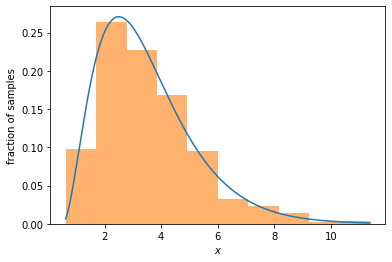

In [297]:
# Отображаем теоретическую плотность распределения
x = np.linspace(sample.min(), sample.max(), 2500)
pdf = gamma_rv.pdf(x)
plt.plot(x, pdf)

# Отображаем гистограмму
plt.hist(sample, density=True, alpha=0.6)

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.show()

### Оценим распределение выборочного среднего нашей случайной величины

Напишем функцию, которая принимает на вход n и возвращает массив выборочных средних 1000 выборок, объём которых n

In [298]:
def generated_sample(n):
    new_sample = np.zeros((1000))

    for i in range(1000):
        # Создаём выборку объёма n
        sample = gamma_rv.rvs(n)
        
        # Считаем выборочное среднее
        average = sample.sum() / n
        
        new_sample[i] = average    
        
    return new_sample        

Напишем функцию, которая принимает на вход n и возвращает значения теоретической плотности распределения, нормально распределённой случайной величины

In [299]:
def apr_norm(n):
    # Определяем значения среднего и дисперсии исходной случайной величины
    mu = gamma_rv.mean()
    sigma = ((gamma_rv.var()) / n)**(0.5)
    
    # зададим нормально распределенную случайную величину
    norm_rv = sts.norm(mu, sigma)
    
    sample = norm_rv.rvs(1000)
    x = np.linspace(sample.min(), sample.max(), 2500)
    pdf = norm_rv.pdf(x)
    return x, pdf

Теперь отобразим гистограммы при различных n и отобразим повер них плотность соответствующего нормального распределения

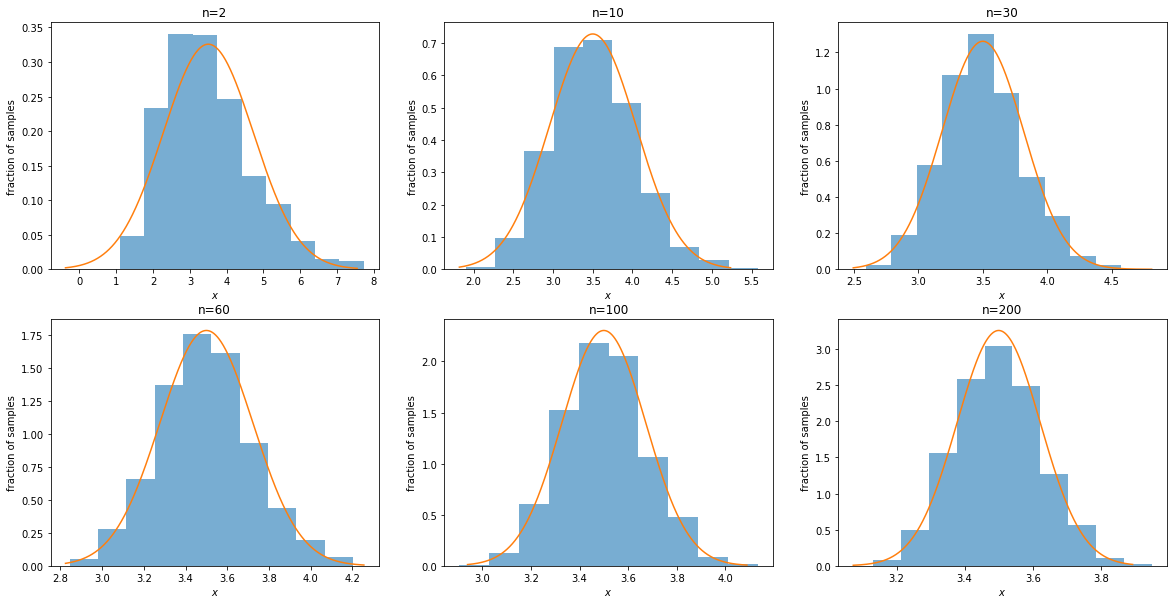

In [300]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

av_sam_n_2 = generated_sample(2)
axs[0][0].hist(av_sam_n_2, density=True, alpha=0.6)
axs[0][0].set_title('n=2')
x_n_2, pdf_n_2 = apr_norm(2)
axs[0][0].plot(x_n_2, pdf_n_2)

av_sam_n_10 = generated_sample(10)
axs[0][1].hist(av_sam_n_10, density=True, alpha=0.6)
axs[0][1].set_title('n=10')
x_n_10, pdf_n_10 = apr_norm(10)
axs[0][1].plot(x_n_10, pdf_n_10)

av_sam_n_30 = generated_sample(30)
axs[0][2].hist(av_sam_n_30, density=True, alpha=0.6)
axs[0][2].set_title('n=30')
x_n_30, pdf_n_30 = apr_norm(30)
axs[0][2].plot(x_n_30, pdf_n_30)

av_sam_n_60 = generated_sample(60)
axs[1][0].hist(av_sam_n_60, density=True, alpha=0.6)
axs[1][0].set_title('n=60')
x_n_60, pdf_n_60 = apr_norm(60)
axs[1][0].plot(x_n_60, pdf_n_60)

av_sam_n_100 = generated_sample(100)
axs[1][1].hist(av_sam_n_100, density=True, alpha=0.6)
axs[1][1].set_title('n=100')
x_n_100, pdf_n_100 = apr_norm(100)
axs[1][1].plot(x_n_100, pdf_n_100)

av_sam_n_200 = generated_sample(200)
axs[1][2].hist(av_sam_n_200, density=True, alpha=0.6)
axs[1][2].set_title('n=200')
x_n_200, pdf_n_200 = apr_norm(200)
axs[1][2].plot(x_n_200, pdf_n_200)

for i in range(2):
    for j in range(3):        
        axs[i][j].set_xlabel('$x$')
        axs[i][j].set_ylabel('fraction of samples')

plt.show()

Теперь отобразим их на одном графике

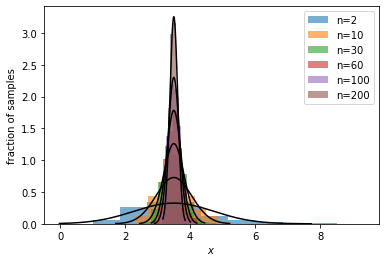

In [301]:
seti = [2, 10, 30, 60, 100, 200]

for i in range(len(seti)):
    plt.hist(generated_sample(seti[i]), density=True, label=f'n={seti[i]}', alpha=0.6)
    x, pdf = apr_norm(seti[i])
    plt.plot(x, pdf, color='black')
    
plt.legend()    
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.show()

### Вывод

Исходя из построенных графиков, мы можем сделать вывод что с увеличением n увеличивается и точность апроксимации, функция сходится к нормальной быстро.